In [2]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.dates as mdates
from datetime import date, timedelta

In [3]:
url = 'https://api.collection.cooperhewitt.org/rest/?method=cooperhewitt.exhibitions.getList&access_token=729cca8ffeb40cd2e725f5301e034134'
resp = requests.request('GET', url)
exhibition = json.loads(resp.text)
exhibition = pd.json_normalize(exhibition['exhibitions'])
exhibition['date_start'] = pd.to_datetime(exhibition['date_start'])
exhibition['date_end'].replace('0000-00-00', '2020-12-30', inplace=True)
exhibition['date_end'] = pd.to_datetime(exhibition['date_end'])
##filtering by the pens dates
exhibition= exhibition[exhibition['date_start'] >= '2014-01-01']

db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visitsItems = pd.read_sql('SELECT * FROM VisitsItems', con=db_connection)
visitsItems['created'] = pd.to_datetime(visitsItems['created'], unit='s')
visitsItems['lastmodified'] = pd.to_datetime(visitsItems['lastmodified'], unit='s')
visitsItems['deleted'].replace(0, np.nan, inplace=True)
visitsItems['deleted'] = pd.to_datetime(visitsItems['deleted'], unit='s')
visitsItems['title'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['description'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
visitsItems['title'] = visitsItems['title'].astype('category')
visitsItems['description'] = visitsItems['description'].astype('category')

In [9]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
pd.set_option("max_colwidth", 500)

In [4]:
def exhibition_visitItems(oneactivity):
    start = oneactivity >= exhibition['date_start']
    end =  oneactivity <= exhibition['date_end']
    return list(exhibition[start & end]['title'])
    
    
results = visitsItems['created'].apply(exhibition_visitItems)
results.to_csv('exhibition_visit_items.csv', encoding='utf-8', index=False)

In [3]:
# results = pd.read_csv('exhibition_visit_items.csv')

In [10]:
visitsItems['exhibition info'] = results

In [11]:
visitsItems_exhibition = visitsItems.drop(['status_id', 'processed', 'input_id'], axis=1)
visitsItems_exhibition.to_csv('visitItems_table_with_exhibition.csv', encoding='utf-8', index=False)

In [12]:
visitsItems_exhibition

,id,user_id,action_id,tool_id,bundle_id,refers_to_id,refers_to_uid,title,description,created,lastmodified,deleted,exhibition info
0,793451,0,1,0,793449,1,18356743,own Charles Dawes name well aftermath,different James Monroe feel just carpenter,2014-10-23 16:25:55,2014-10-23 16:25:55,NaT,[]
1,793453,0,2,9,793449,1,18146475,great John C. Breckinridge have very achieve,other Walter Mondale talk when picture,2014-10-23 16:26:15,2014-10-23 16:26:15,NaT,[]
2,793455,0,2,6,793449,1,18311851,first John C. Calhoun think only fuel,old Al Gore walk too year,2014-10-23 16:26:55,2014-10-23 16:26:55,NaT,[]
3,793459,3,2,7,793449,1,18476565,early Henry A. Wallace call out wrist,good John F. Kennedy tell also government,2014-10-23 16:27:59,2014-10-23 16:27:59,NaT,[]
4,793495,3,2,7,793449,1,18628929,same Hubert Humphrey kick very health,next Joe Biden come when creature,2014-10-23 19:36:56,2014-10-23 19:36:56,NaT,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479553,132873405,0,2,12,132777661,0,1595449503,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:25:03,2020-07-22 20:25:03,NaT,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
18479554,132873409,28814,2,12,132777661,0,1595449610,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:26:50,2020-07-22 20:26:50,NaT,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
18479555,132873413,28814,2,12,132777661,0,1595449666,My Table,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:27:46,2020-07-22 20:27:46,NaT,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"
18479556,132873417,28814,2,3,132777661,0,1595450275,My Wallpaper,Made at Cooper Hewitt Museum using a Collections Table.,2020-07-22 20:37:55,2020-07-22 20:37:55,NaT,"[Willi Smith: Street Couture, Contemporary Muslim Fashions, Botanical Expressions, Herbert Bayer: Bauhaus Master, After Icebergs, Nature by Design: Cochineal, Face Values: Exploring Artificial Intelligence, Collection Selects: Wyss Institute, Plastics, Botanical Lessons, Bathing Beautiful]"


In [14]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(visitsItems['exhibition info']).value_counts()

Hewitt Sisters Collect                                                                          14643583
Making Design                                                                                   10202955
Pixar: The Design of Story                                                                       8252975
Passion for the Exotic: Louis Comfort Tiffany and Lockwood de Forest                             7731160
Thom Browne Selects                                                                              6659329
Beauty—Cooper Hewitt Design Triennial                                                            6569466
Energizing the Everyday: Gifts From the George R. Kravis II Collection                           5973557
Making Design: Recent Acquisitions                                                               4272484
Fragile Beasts                                                                                   4213237
Passion for the Exotic: Lockwood de Forest, Frederic Ch

Text(0.5, 1.0, 'The exhibitions by visit items')

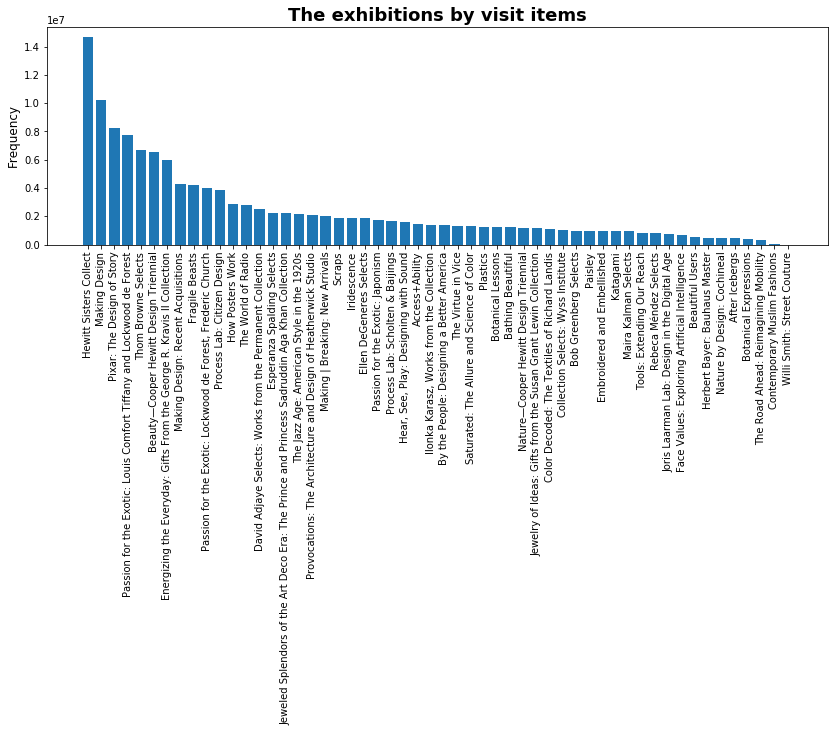

In [15]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(visitsItems['exhibition info']).value_counts().index,
        to_1D(visitsItems['exhibition info']).value_counts().values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Exhibition Title", size = 14)
plt.title('The exhibitions by visit items', fontdict={'fontweight': 'bold', 'fontsize':18})
# plt.savefig('exhibition_visitItems.png', dpi=300)

# what exhibitions encourage to create more?

In [14]:
created_exhibition = visitsItems_exhibition[visitsItems['action_id'] == 2]

In [15]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(created_exhibition['exhibition info']).value_counts()

Hewitt Sisters Collect                                                                          307217
Making Design                                                                                   201548
Pixar: The Design of Story                                                                      133996
Passion for the Exotic: Louis Comfort Tiffany and Lockwood de Forest                            133633
Passion for the Exotic: Lockwood de Forest, Frederic Church                                     121161
Energizing the Everyday: Gifts From the George R. Kravis II Collection                          109631
Thom Browne Selects                                                                              95278
How Posters Work                                                                                 92251
Process Lab: Citizen Design                                                                      89972
Beauty—Cooper Hewitt Design Triennial                                    

Text(0.5, 1.0, 'The exhibitions by created items')

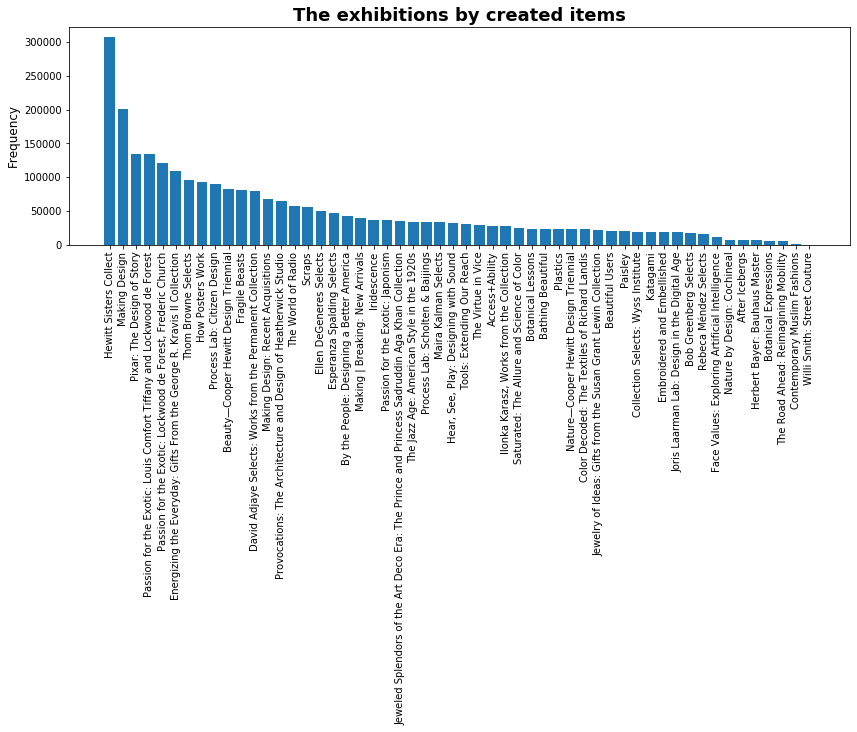

In [16]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(created_exhibition['exhibition info']).value_counts().index,
        to_1D(created_exhibition['exhibition info']).value_counts().values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Exhibition Title", size = 14)
plt.title('The exhibitions by created items', fontdict={'fontweight': 'bold', 'fontsize':18})
# plt.savefig('exhibition_visitItems.png', dpi=300)